In [142]:
import networkx as nx
import csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [1]:
green_spotify = "#1DB954"

In [144]:
def plot_in_out_degree(network):
    in_degrees = np.array([x[1] for x in list(network.in_degree)])
    out_degrees = np.array([x[1] for x in list(network.out_degree)])
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(7.5 * 2, 4.8), sharey=True)
    ax1.set_title("Distribución grado de entrada");
    ax2.set_title("Distribución grado de salida");
    ax1.set_ylabel("Cantidad de nodos")
    ax1.set_xlabel("Grado de entrada")
    ax2.set_xlabel("Grado de salida")
    ax2.set_xticks(range(0, 21, 5))

    sns.histplot(in_degrees, kde=True, ax=ax1, stat="count", color=green_spotify)
    sns.histplot(out_degrees, kde=True, ax=ax2, stat="count", color=green_spotify)
    plt.show()

In [145]:
network = nx.DiGraph() 
artistas = {}
popularity = {}
followers = {}
with open("data/nodes2.csv", "r") as nodes, open("data/edges.csv", "r") as edges:
    reader = csv.reader(nodes, delimiter=',')
    next(reader, None) # skip header
    for row in reader:
        id = row[0]
        network.add_node(id)
        artistas[id] = row[1]
        popularity[id] = row[2]
        followers[id] = row[3]
    reader = csv.reader(edges, delimiter=';')
    next(reader, None)
    for source, target in reader:
        network.add_edge(source, target)

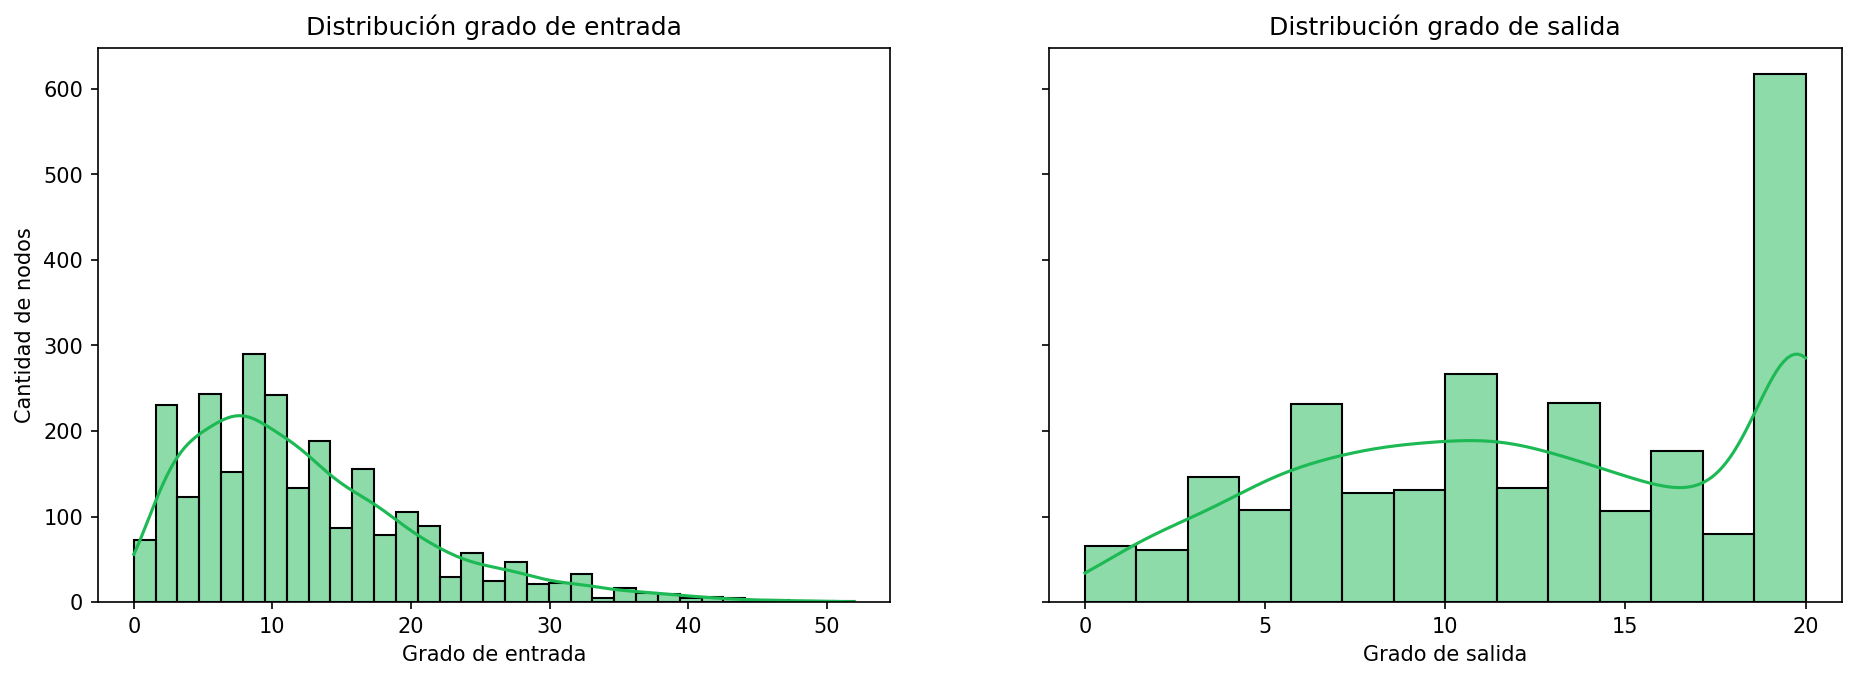

In [146]:
plot_in_out_degree(network)

In [147]:
bwcc = network.subgraph(list(max(nx.strongly_connected_components(network), key = len)))
len(bwcc)

1960

In [148]:
candidatos = []
for id, dg in bwcc.out_degree:
    if dg == 0 or dg == 1:
        candidatos.append(id)

In [149]:
diameter_path = []
for candidato in candidatos:
    path = nx.shortest_path(network, source = "14GfQ6EEHnp1lTAWHgtcYy", target = candidato)
    if len(path) == 27:
        diameter_path = path
        print("Bingo")

Bingo


In [150]:
diameter_path

['14GfQ6EEHnp1lTAWHgtcYy',
 '63MoX25vZtzCSTvRFkAsnW',
 '5SyvBTttsNPEcFjtceTBmx',
 '4jCduxx9HzFKS0RrRAtVXD',
 '2lHzW2pMhRYX3ohx5lZY8y',
 '2nrSPPSfNesng85eRV4W4m',
 '72v53CufRiSyqcQ78KUQ5p',
 '2UFqwY8A3PLcx8pAkg9g5P',
 '24dYJ8P3YuFihvMcElFUWh',
 '03Yb3iBy9GCifXiATEFcit',
 '01rgao9OzfBm2BOHWJpi1Y',
 '4LFOoXhMhnq9U8VsZkSwxl',
 '6cnl6Jz97730GUS8zEAK77',
 '2Lxa3SFNEW0alfRvtdXOul',
 '34nbQa7Hug9DYkRJpfKNFv',
 '0elWFr7TW8piilVRYJUe4P',
 '3Me35AWHCGqW4sZ7bWWJt1',
 '1yX62RHdYysNcIrO33WQxJ',
 '2Atk4SWx7daQtItQBa735M',
 '3qsKSpcV3ncke3hw52JSMB',
 '0AqlFI0tz2DsEoJlKSIiT9',
 '4GepMkTgrIZECoCC55vqjW',
 '4PdggFNYwGfjRfkdG5OfES',
 '7zREGj8GMl9UrDa6NPLi0H',
 '5nAsuOI0lqqbii7YFCh7cB',
 '3xShMakbBNG2e7qSpxkIUy',
 '2khkr5XqC2TxpYi54PI7lo']

In [151]:
top = sorted(network.in_degree, key=lambda x: x[1], reverse=True)[0:15]
xx = np.array([f'{artistas[x[0]]} ({popularity[x[0]]})' for x in top])
yy = np.array([x[1] for x in top])

[]

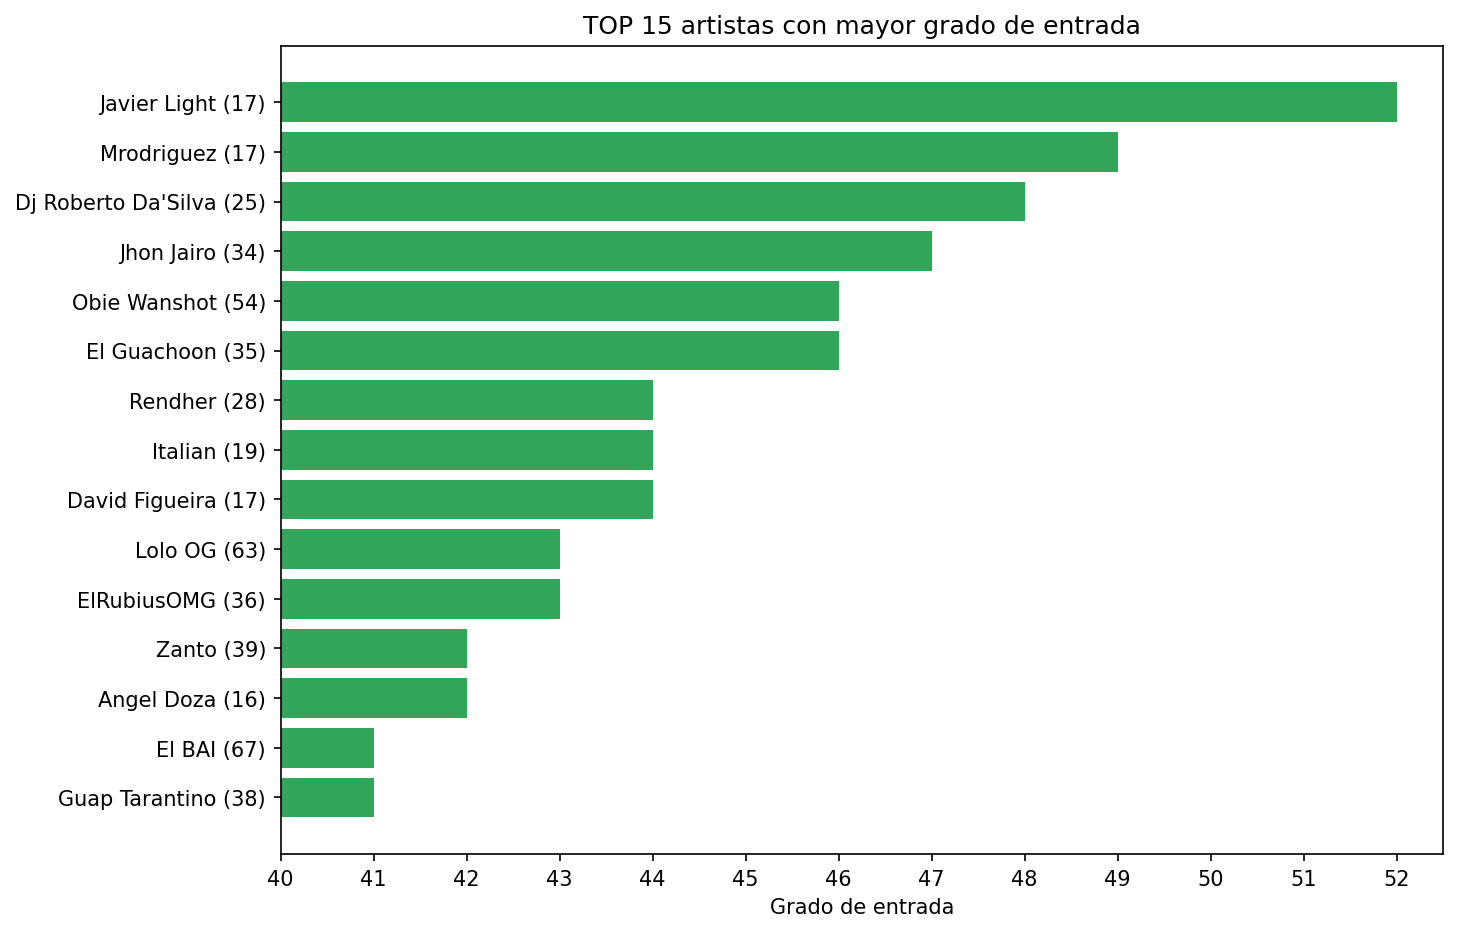

In [162]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10, 7))
sns.barplot(
    y=xx,
    x=yy,
    ax=ax,
    color=green_spotify
)
ax.set_title("TOP 15 artistas con mayor grado de entrada")
ax.set_xticks(range(40, 61, 1))
ax.set_xlim((40, 52.5))
ax.set_xlabel("Grado de entrada")
plt.plot()

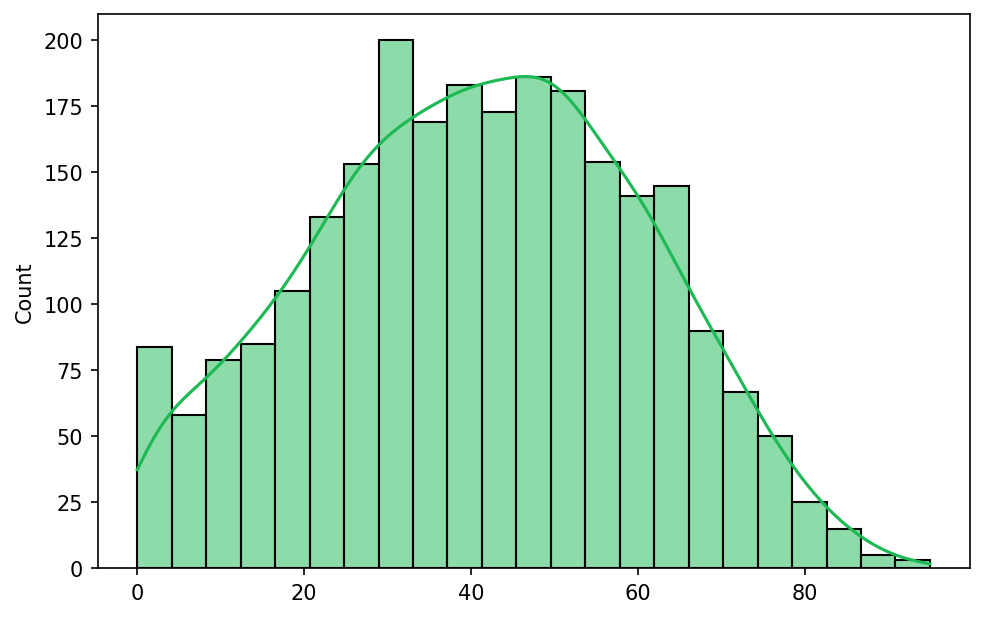

In [170]:
x = np.array([int(x) for x in popularity.values()])

fig, (ax1) = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(7.5, 4.8), sharey=True)
sns.histplot(x, kde=True, ax=ax1, stat="count", color=green_spotify)
plt.show()